#  P218

# Group - 2
#### Name -
1. **Shunottara Alhat**
2. ** **

# <dir> <center> Project Name -  Bankruptcy Prevention </center></dir>


### Business Objective:

This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from different features.
 

#### Import Libraries 

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from matplotlib import pyplot
from sklearn.model_selection import train_test_split # train and test
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing 
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score,accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [94]:
#!pip install lightgbm

#### Import Data 

In [2]:
Bankrupt = pd.read_excel(r"bankruptcy-prevention (1).xlsx")
Bankrupt

,industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class
0,0.5;1;0;0;0;0.5;bankruptcy
1,0;1;0;0;0;1;bankruptcy
2,1;0;0;0;0;1;bankruptcy
3,0.5;0;0;0.5;0;1;bankruptcy
4,1;1;0;0;0;1;bankruptcy
...,...
245,0;1;1;1;1;1;non-bankruptcy
246,1;1;0.5;1;1;0;non-bankruptcy
247,0;1;1;0.5;0.5;0;non-bankruptcy
248,1;0;0.5;1;0.5;0;non-bankruptcy


#### We need to have LOW(industrial risk,management risk,operating risk) and HIGH(financial flexibility,credibility,competitiveness) in ordere to avoid Bankruptcy 

In [3]:
# Converting excel file into CSV file
Bankrupt.to_csv ("Bankruptcy-Prevention.csv", index = None, header=True)

In [4]:
# Reading and Converting the output csv file into a dataframe object
Bankruptcy = pd.DataFrame(pd.read_csv("Bankruptcy-Prevention.csv", sep = ';', header = 0))

Bankruptcy

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


### Here we are changing the target variable to bankruptcy = 0, non-bankruptcy = 1 

In [5]:
#bankrupt_new = Bankruptcy.iloc[:,:]  # iloc helps us to select a specific row or column from the data set
#bankrupt_new

In [6]:
labelencoder = LabelEncoder()
Bankruptcy.iloc[:, -1] = labelencoder.fit_transform(Bankruptcy.iloc[:,-1])

In [7]:
Bankruptcy

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


#### Using Label Encoder at a categorical column to get binary value as its a classification project 

# Exploratory Data Analysis

In [8]:
# Describe

Bankruptcy.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000,0.572000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575,0.495781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Info

Bankruptcy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    int32  
dtypes: float64(6), int32(1)
memory usage: 12.8 KB


In [10]:
# Shape

Bankruptcy.shape

(250, 7)

#### Missing Value 

In [11]:
Bankruptcy.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

#### Correlation 

In [12]:
Bankruptcy.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


#### IN this correlation matrix we can see no columns are correlated to each other neither input variables 

<AxesSubplot:>

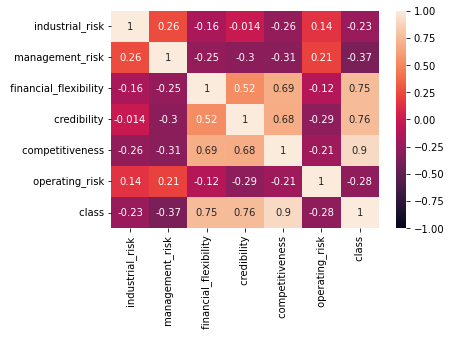

In [13]:
# Heatmap

sns.heatmap(Bankruptcy.corr(), vmin = -1, vmax = 1, annot = True)

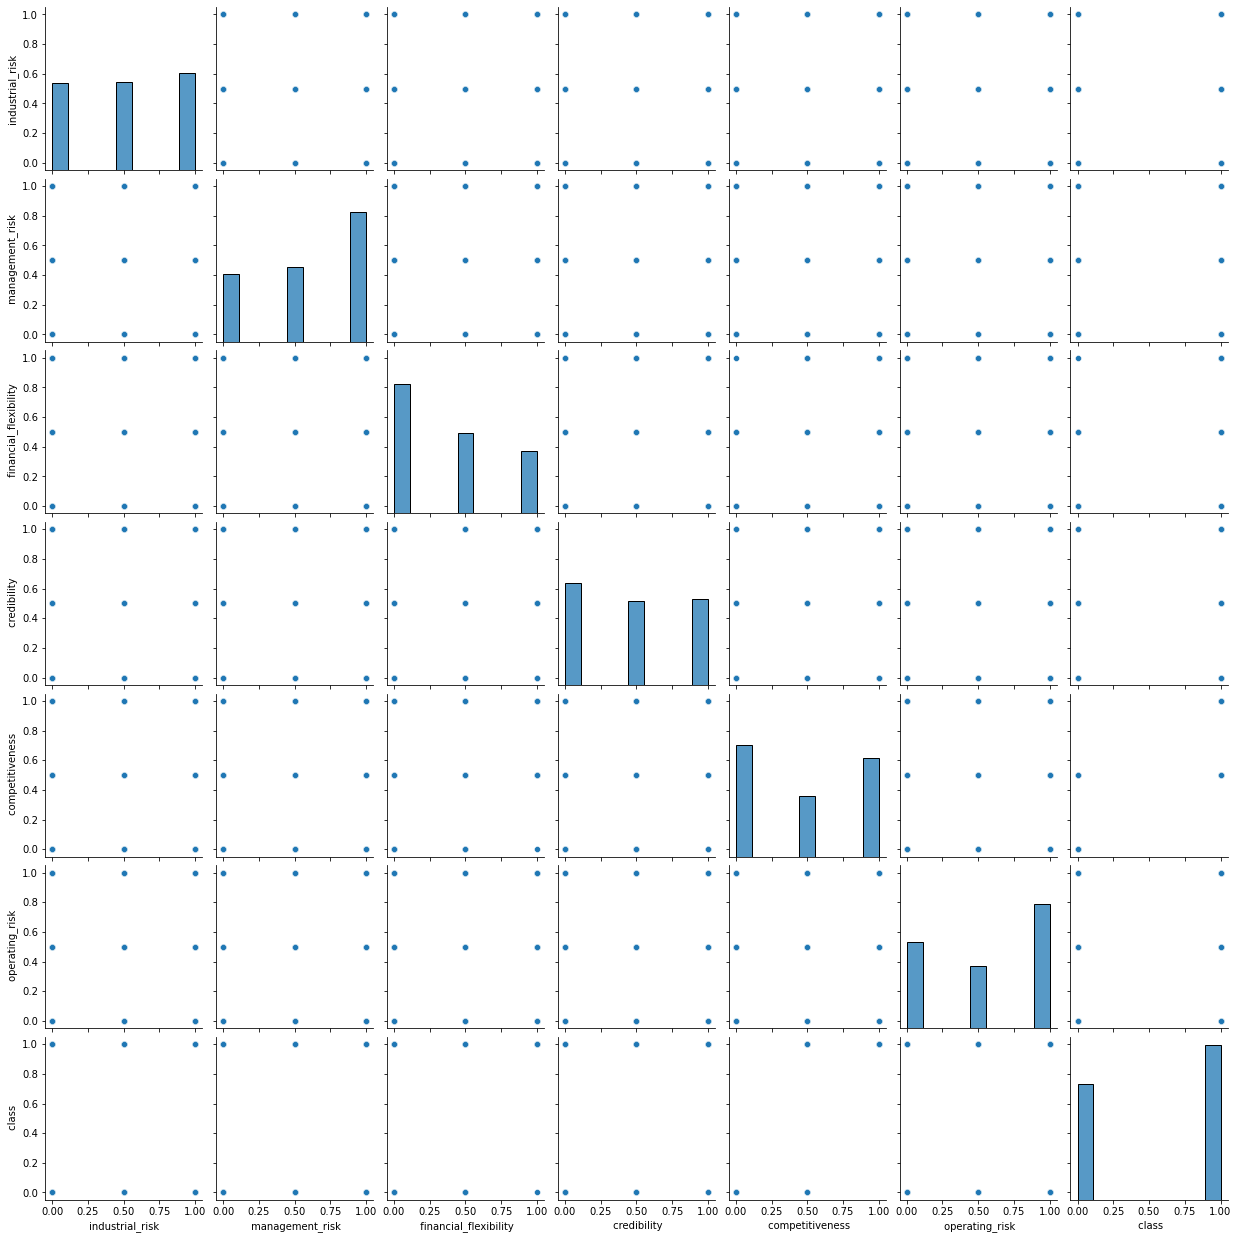

In [14]:
# Outlier Detection and Data Visualization

sns.pairplot(Bankruptcy)

#### OUTLIER DETECTION USING ISOLATION FOREST 
Our algoritm can suffer a lot we dont remove the outliers and to avoid this problem we will drop the values**

In an Isolation Forest, randomly sub-sampled data is processed in a tree structure based on randomly selected features. The samples that travel deeper into the tree are less likely to be anomalies as they required more cuts to isolate them

In [15]:
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(Bankruptcy)
y_pred_outliers = clf.predict(Bankruptcy)
y_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [16]:
Bankruptcy['scores'] = clf.decision_function(Bankruptcy)
Bankruptcy['anomaly'] = clf.predict(Bankruptcy.iloc[:,0:7])
Bankruptcy

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,scores,anomaly
0,0.5,1.0,0.0,0.0,0.0,0.5,0,0.145712,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0,0.179722,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0,0.089607,1
3,0.5,0.0,0.0,0.5,0.0,1.0,0,0.067834,1
4,1.0,1.0,0.0,0.0,0.0,1.0,0,0.215060,1
...,...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1,0.104623,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1,0.091653,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1,0.088232,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1,0.068579,1


In [17]:
#print the anomaly

Bankruptcy[Bankruptcy['anomaly']==-1]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,scores,anomaly
27,0.0,0.0,0.0,0.0,0.0,1.0,0,-0.000517,-1
72,1.0,0.5,1.0,0.5,0.0,0.0,0,-0.044748,-1
192,0.5,1.0,0.0,0.0,1.0,0.0,1,-0.002184,-1


#### These are the outliers. Now we will drop them and reset the index

In [18]:
Bankruptcy = Bankruptcy.drop(Bankruptcy.index[[27, 72, 192]], axis=0)
Bankruptcy.reset_index(drop=True,inplace = True)
Bankruptcy

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,scores,anomaly
0,0.5,1.0,0.0,0.0,0.0,0.5,0,0.145712,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0,0.179722,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0,0.089607,1
3,0.5,0.0,0.0,0.5,0.0,1.0,0,0.067834,1
4,1.0,1.0,0.0,0.0,0.0,1.0,0,0.215060,1
...,...,...,...,...,...,...,...,...,...
242,0.0,1.0,1.0,1.0,1.0,1.0,1,0.104623,1
243,1.0,1.0,0.5,1.0,1.0,0.0,1,0.091653,1
244,0.0,1.0,1.0,0.5,0.5,0.0,1,0.088232,1
245,1.0,0.0,0.5,1.0,0.5,0.0,1,0.068579,1


### Univariate Histogram 

<function matplotlib.pyplot.show(close=None, block=None)>

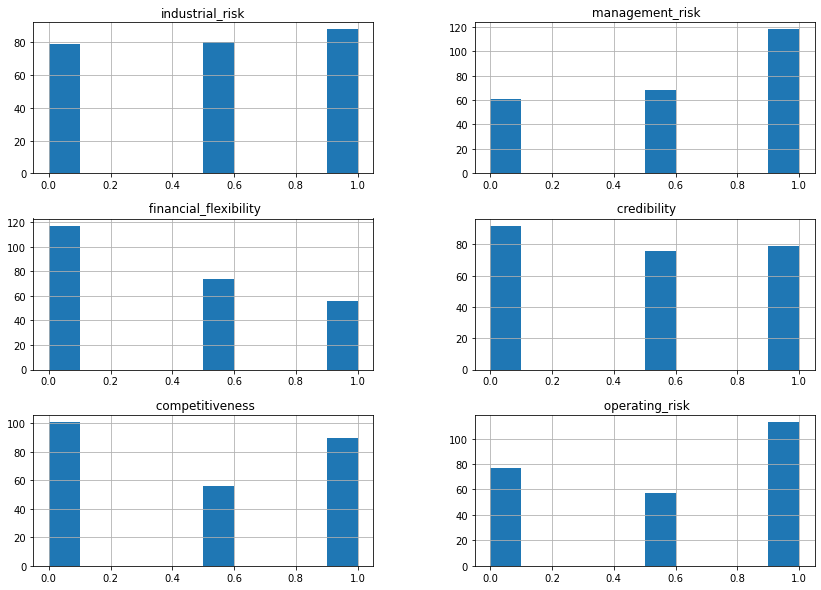

In [19]:
data1 = Bankruptcy.iloc[0:,:6]
data1.hist(figsize=(14,10))
pyplot.show

### Split the data into Train and Test


In [20]:
# Input
X = Bankruptcy.iloc[:,0:6]

# Target variable

y = Bankruptcy.iloc[:,6]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X , y, test_size = 0.25, random_state = 0)
x_train.shape, x_test.shape

((185, 6), (62, 6))

# Build Models

### Support Vector Machine Classifier 

In [22]:

sv = SVC()
sv.fit(x_train,y_train)
predict1 = sv.predict(x_test)

In [23]:
y_train

33     0
171    1
76     0
168    1
222    1
      ..
67     0
192    1
117    1
47     0
172    1
Name:  class, Length: 185, dtype: int32

In [24]:
predict11= sv.predict(x_train)
accuracy_11 = accuracy_score(y_train,predict11)
accuracy_11        #accuracy of train data

1.0

In [25]:
accuracy_1 = accuracy_score(y_test,predict1)
accuracy_1      #accuracy of test data

1.0

In [26]:
cm1 = confusion_matrix(y_test,predict1)
cm1

array([[21,  0],
       [ 0, 41]], dtype=int64)

Text(33.0, 0.5, 'Truth')

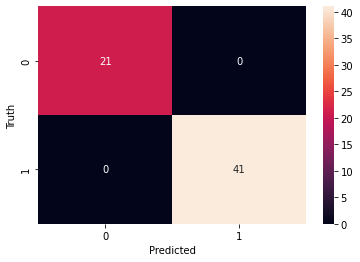

In [27]:
sns.heatmap(cm1,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [28]:
print(classification_report(y_test,predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        41

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



In [29]:
accuracy_11 = round(accuracy_score(y_train,predict11),4)
accuracy_1 = round(accuracy_score(y_test,predict1),4)
precision_1 = round(precision_score(y_test,predict1,average = 'macro'),4)
recall_1 = round(recall_score(y_test,predict1, average = 'macro'),4)
f1_1 = round(f1_score(y_test,predict1, average = 'macro'),4)

In [30]:
print('Train Accuracy Score  : ', accuracy_11)
print('Test Accuracy Score  : ', accuracy_1)
print('Precision Score : ', precision_1)
print('Recall Score    : ', recall_1)
print('f1-Score        : ', f1_1)

Train Accuracy Score  :  1.0
Test Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


### Random Forest Classifier

In [40]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predict2=rf.predict(x_test)

In [41]:
predict22= rf.predict(x_train)
accuracy_22 = accuracy_score(y_train,predict22)
accuracy_22       #accuracy of train data

1.0

In [42]:
accuracy_2 = accuracy_score(y_test,predict2)
accuracy_2          #accuracy of test data

0.9838709677419355

In [43]:
cm2 = confusion_matrix(y_test,predict2)
cm2

array([[21,  0],
       [ 1, 40]], dtype=int64)

Text(33.0, 0.5, 'Truth')

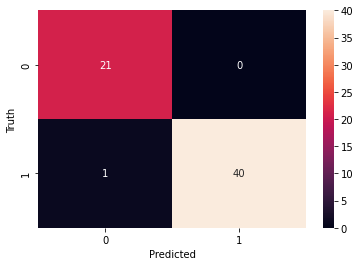

In [44]:
sns.heatmap(cm2,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [45]:
print(classification_report(y_test,predict2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.98      0.99        41

    accuracy                           0.98        62
   macro avg       0.98      0.99      0.98        62
weighted avg       0.98      0.98      0.98        62



In [46]:
accuracy_22 = round(accuracy_score(y_train,predict22),4)
accuracy_2 = round(accuracy_score(y_test,predict2),4)
precision_2 = round(precision_score(y_test,predict2,average = 'macro'),4)
recall_2 = round(recall_score(y_test,predict2, average = 'macro'),4)
f1_2 = round(f1_score(y_test,predict2, average = 'macro'),4)

In [47]:
print('Train Accuracy Score  : ', accuracy_22)
print('Test Accuracy Score  : ', accuracy_2)
print('Precision Score : ', precision_2)
print('Recall Score    : ', recall_2)
print('f1-Score        : ', f1_2)

Train Accuracy Score  :  1.0
Test Accuracy Score  :  0.9839
Precision Score :  0.9773
Recall Score    :  0.9878
f1-Score        :  0.9822


### K Neighbour Classifier 

In [49]:
kn = OneVsRestClassifier(KNeighborsClassifier())
kn.fit(x_train, y_train)
predict3 = kn.predict(x_test)

In [50]:
predict33 = kn.predict(x_train)
accuracy_33 = accuracy_score(y_train , predict33)
accuracy_33              #accuracy of train data

1.0

In [51]:
accuracy_3 = accuracy_score(y_test,predict3)
accuracy_3         #accuracy of test data

0.9838709677419355

In [52]:
cm3 = confusion_matrix(y_test,predict3)
cm3

array([[21,  0],
       [ 1, 40]], dtype=int64)

Text(33.0, 0.5, 'Truth')

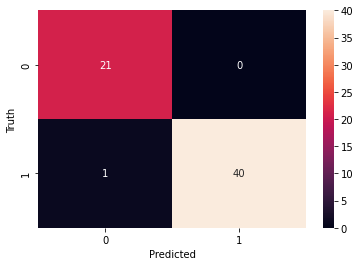

In [53]:
sns.heatmap(cm3,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [54]:
print(classification_report(y_test,predict3))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.98      0.99        41

    accuracy                           0.98        62
   macro avg       0.98      0.99      0.98        62
weighted avg       0.98      0.98      0.98        62



In [55]:
accuracy_33 = round(accuracy_score(y_train,predict33),4)
accuracy_3 = round(accuracy_score(y_test,predict3),4)
precision_3 = round(precision_score(y_test,predict3,average = 'macro'),4)
recall_3 = round(recall_score(y_test,predict3, average = 'macro'),4)
f1_3 = round(f1_score(y_test,predict3, average = 'macro'),4)

In [56]:
print('Train Accuracy Score  : ', accuracy_33)
print('Test Accuracy Score  : ', accuracy_3)
print('Precision Score : ', precision_3)
print('Recall Score    : ', recall_3)
print('f1-Score        : ', f1_3)

Train Accuracy Score  :  1.0
Test Accuracy Score  :  0.9839
Precision Score :  0.9773
Recall Score    :  0.9878
f1-Score        :  0.9822


### Logistic Regression 

In [57]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
predict4=lg.predict(x_test)

In [58]:
predict44= lg.predict(x_train)
accuracy_44 = accuracy_score(y_train,predict44)
accuracy_44     #accuracy of train data

1.0

In [59]:
accuracy_4 = accuracy_score(y_test,predict4)
accuracy_4 #accuracy of test data

1.0

In [60]:
cm4=confusion_matrix(y_test,predict4)
cm4

array([[21,  0],
       [ 0, 41]], dtype=int64)

Text(33.0, 0.5, 'Truth')

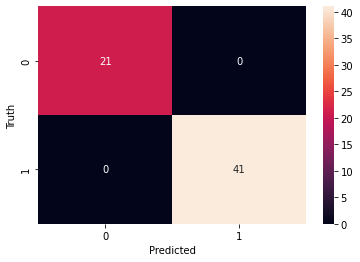

In [61]:
sns.heatmap(cm4,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [62]:
print(classification_report(y_test,predict4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        41

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



In [63]:
accuracy_44 = round( accuracy_score(y_train,predict44),4)
accuracy_4 = round(accuracy_score(y_test,predict4),4)
precision_4 = round(precision_score(y_test,predict4,average = 'macro'),4)
recall_4 = round(recall_score(y_test,predict4, average = 'macro'),4)
f1_4 = round(f1_score(y_test,predict4, average = 'macro'),4)

In [64]:
print('Train Accuracy Score  : ', accuracy_44)
print('Test Accuracy Score  : ', accuracy_4)
print('Precision Score : ', precision_4)
print('Recall Score    : ', recall_4)
print('f1-Score        : ', f1_4)

Train Accuracy Score  :  1.0
Test Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


### Decision Tree Classifier 

In [65]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train,y_train)
predict5=dt.predict(x_test)

In [66]:
predict55= dt.predict(x_train)
accuracy_55 = accuracy_score(y_train,predict55)
accuracy_55     #accuracy of train data

1.0

In [67]:
accuracy_5 = accuracy_score(y_test,predict5)
accuracy_5 #accuracy of test data

0.9838709677419355

In [68]:
cm5=confusion_matrix(y_test,predict5)
cm5

array([[21,  0],
       [ 1, 40]], dtype=int64)

Text(33.0, 0.5, 'Truth')

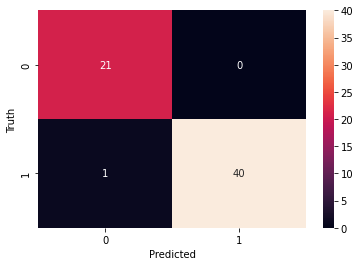

In [69]:
sns.heatmap(cm5,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [70]:
print(classification_report(y_test,predict5))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.98      0.99        41

    accuracy                           0.98        62
   macro avg       0.98      0.99      0.98        62
weighted avg       0.98      0.98      0.98        62



In [71]:
accuracy_55 = round( accuracy_score(y_train,predict55),4)
accuracy_5 = round(accuracy_score(y_test,predict5),4)
precision_5 = round(precision_score(y_test,predict5,average = 'macro'),4)
recall_5 = round(recall_score(y_test,predict5, average = 'macro'),4)
f1_5 = round(f1_score(y_test,predict5, average = 'macro'),4)

In [72]:
print('Train Accuracy Score  : ', accuracy_55)
print('Test Accuracy Score  : ', accuracy_5)
print('Precision Score : ', precision_5)
print('Recall Score    : ', recall_5)
print('f1-Score        : ', f1_5)

Train Accuracy Score  :  1.0
Test Accuracy Score  :  0.9839
Precision Score :  0.9773
Recall Score    :  0.9878
f1-Score        :  0.9822


### AdaBoost Classifier

In [76]:
ab = AdaBoostClassifier()
ab.fit(x_train,y_train)
predict6=ab.predict(x_test)

In [77]:
predict66= ab.predict(x_train)
accuracy_66 = accuracy_score(y_train,predict66)
accuracy_66    #accuracy of train data

1.0

In [78]:
accuracy_6 = accuracy_score(y_test,predict6)
accuracy_6 #accuracy of test data

1.0

In [79]:
cm6 = confusion_matrix(y_test,predict6)
cm6

array([[21,  0],
       [ 0, 41]], dtype=int64)

Text(33.0, 0.5, 'Truth')

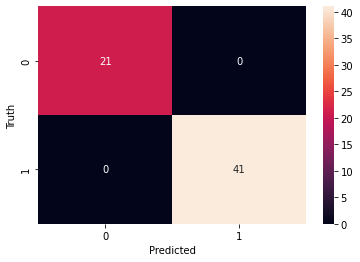

In [80]:
sns.heatmap(cm6,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [81]:
print(classification_report(y_test,predict6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        41

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



In [82]:
accuracy_66 = round(accuracy_score(y_train,predict66),4)
accuracy_6 = round(accuracy_score(y_test,predict6),4)
precision_6 = round(precision_score(y_test,predict6,average = 'macro'),4)
recall_6 = round(recall_score(y_test,predict6, average = 'macro'),4)
f1_6 = round(f1_score(y_test,predict6, average = 'macro'),4)

In [83]:
print('Train Accuracy Score  : ', accuracy_66)
print('Test Accuracy Score  : ', accuracy_6)
print('Precision Score : ', precision_6)
print('Recall Score    : ', recall_6)
print('f1-Score        : ', f1_6)

Train Accuracy Score  :  1.0
Test Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


### GradientBoosting Classifier 

In [84]:
gd = GradientBoostingClassifier()
gd.fit(x_train,y_train)
predict7 = gd.predict(x_test)

In [85]:
predict77= gd.predict(x_train)
accuracy_77 = accuracy_score(y_train,predict77)
accuracy_77   #accuracy of train data

1.0

In [86]:
accuracy_7 = accuracy_score(y_test,predict7)
accuracy_7 #accuracy of test data

0.9838709677419355

In [87]:
cm7 = confusion_matrix(y_test,predict7)
cm7

array([[21,  0],
       [ 1, 40]], dtype=int64)

Text(33.0, 0.5, 'Truth')

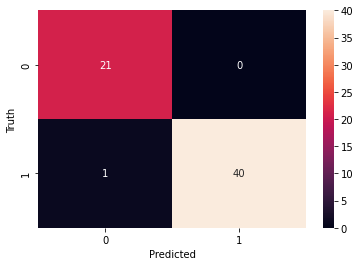

In [88]:
sns.heatmap(cm7,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [89]:
print(classification_report(y_test,predict7))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.98      0.99        41

    accuracy                           0.98        62
   macro avg       0.98      0.99      0.98        62
weighted avg       0.98      0.98      0.98        62



In [90]:
accuracy_77 = round(accuracy_score(y_train,predict77),4)
accuracy_7 = round(accuracy_score(y_test,predict7),4)
precision_7 = round(precision_score(y_test,predict7,average = 'macro'),4)
recall_7 = round(recall_score(y_test,predict7, average = 'macro'),4)
f1_7 = round(f1_score(y_test,predict7, average = 'macro'),4)

In [91]:
print('Train Accuracy Score  : ', accuracy_77)
print('Test Accuracy Score  : ', accuracy_7)
print('Precision Score : ', precision_7)
print('Recall Score    : ', recall_7)
print('f1-Score        : ', f1_7)

Train Accuracy Score  :  1.0
Test Accuracy Score  :  0.9839
Precision Score :  0.9773
Recall Score    :  0.9878
f1-Score        :  0.9822


### XGBoost Classifier 

In [97]:
xg = XGBClassifier()
xg.fit(x_train,y_train)
predict8 = xg.predict(x_test)

In [98]:
predict88= xg.predict(x_train)
accuracy_88 = accuracy_score(y_train,predict88)
accuracy_88   #accuracy of train data

1.0

In [99]:
accuracy_8 = accuracy_score(y_test,predict8)
accuracy_8#accuracy of test data

1.0

In [100]:
cm8 = confusion_matrix(y_test,predict8)
cm8

array([[21,  0],
       [ 0, 41]], dtype=int64)

Text(33.0, 0.5, 'Truth')

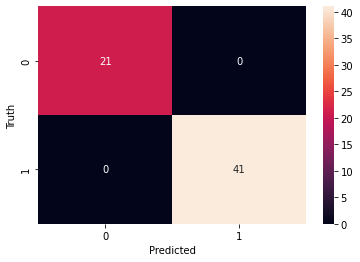

In [101]:
sns.heatmap(cm8,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [102]:
print(classification_report(y_test,predict8))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        41

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



In [103]:
accuracy_88 = round(accuracy_score(y_train,predict88),4)
accuracy_8 = round(accuracy_score(y_test,predict8),4)
precision_8 = round(precision_score(y_test,predict8,average = 'macro'),4)
recall_8 = round(recall_score(y_test,predict8, average = 'macro'),4)
f1_8 = round(f1_score(y_test,predict8, average = 'macro'),4)

In [104]:
print('Train Accuracy Score  : ', accuracy_88)
print('Test Accuracy Score  : ', accuracy_8)
print('Precision Score : ', precision_8)
print('Recall Score    : ', recall_8)
print('f1-Score        : ', f1_8)

Train Accuracy Score  :  1.0
Test Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


### LGBM Boosting Classifier 

In [105]:
lgbm = LGBMClassifier()
lgbm.fit(x_train,y_train)
predict9 = lgbm.predict(x_test)

In [106]:
predict99= lgbm.predict(x_train)
accuracy_99 = accuracy_score(y_train,predict99)
accuracy_99   #accuracy of train data

1.0

In [107]:
accuracy_9 = accuracy_score(y_test,predict9)
accuracy_9 #accuracy of test data

0.9838709677419355

In [108]:
cm9 = confusion_matrix(y_test,predict9)
cm9

array([[21,  0],
       [ 1, 40]], dtype=int64)

Text(33.0, 0.5, 'Truth')

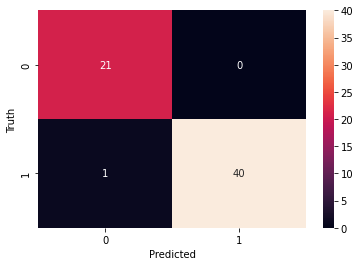

In [109]:
sns.heatmap(cm9,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [110]:
print(classification_report(y_test,predict9))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.98      0.99        41

    accuracy                           0.98        62
   macro avg       0.98      0.99      0.98        62
weighted avg       0.98      0.98      0.98        62



In [111]:
accuracy_99 = round(accuracy_score(y_train,predict99),4)
accuracy_9 = round(accuracy_score(y_test,predict9),4)
precision_9 = round(precision_score(y_test,predict9,average = 'macro'),4)
recall_9 = round(recall_score(y_test,predict9, average = 'macro'),4)
f1_9 = round(f1_score(y_test,predict9, average = 'macro'),4)

In [112]:
print('Train Accuracy Score  : ', accuracy_99)
print('Test Accuracy Score  : ', accuracy_9)
print('Precision Score : ', precision_9)
print('Recall Score    : ', recall_9)
print('f1-Score        : ', f1_9)

Train Accuracy Score  :  1.0
Test Accuracy Score  :  0.9839
Precision Score :  0.9773
Recall Score    :  0.9878
f1-Score        :  0.9822


### Comparing Accuracy By Different Models 

In [113]:
table = {'Classifier' : ['SVM Classifier','Random Forest Classifier','K Neighbour Classifier' ,'Logistic Regression Model',
                         'Dicision Tree Classifier','AdaBoost Classifier', 'Gradient Boosting Classifier',
                         'Xtreme Gradient Boosting Classifier', 'Light Gradient Boosting Classifier'],
         'Train Accuracy' : [accuracy_11, accuracy_22, accuracy_33, accuracy_44, accuracy_55, accuracy_66,
                             accuracy_77, accuracy_88, accuracy_99],
         'Test Accuracy' : [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6,
                            accuracy_7, accuracy_8, accuracy_9],
         'Precision Score' : [precision_1, precision_2,precision_3, precision_4, precision_5, precision_6,
                              precision_7, precision_8, precision_9],
         'Recall Score' : [recall_1, recall_2,recall_3, recall_4, recall_5, recall_6, recall_7, recall_8, recall_9],
         'F1_Score' : [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7, f1_8, f1_9,]}
table = pd.DataFrame(table)
table.sort_values(["Test Accuracy"],inplace = True, ignore_index=True)
table

,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1_Score
0,Random Forest Classifier,1.0,0.9839,0.9773,0.9878,0.9822
1,K Neighbour Classifier,1.0,0.9839,0.9773,0.9878,0.9822
2,Dicision Tree Classifier,1.0,0.9839,0.9773,0.9878,0.9822
3,Gradient Boosting Classifier,1.0,0.9839,0.9773,0.9878,0.9822
4,Light Gradient Boosting Classifier,1.0,0.9839,0.9773,0.9878,0.9822
5,SVM Classifier,1.0,1.0000,1.0000,1.0000,1.0000
6,Logistic Regression Model,1.0,1.0000,1.0000,1.0000,1.0000
7,AdaBoost Classifier,1.0,1.0000,1.0000,1.0000,1.0000
8,Xtreme Gradient Boosting Classifier,1.0,1.0000,1.0000,1.0000,1.0000


# Pickle

Saving the Trained Model

In [114]:
import pickle

In [115]:
filename = 'Bankruptcy.pkl'
pickle.dump(sv, open(filename, 'wb'))  # sv is Support Vector Machine Classifier

In [116]:
# Loading the Save Model

loaded_model = pickle.load(open('Bankruptcy.pkl','rb'))

In [117]:
loaded_model

SVC()